## import dependencies

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [2]:
from subprocess import check_output
print(check_output(["ls", "../../resources/prices"]).decode("utf8"))

coin_Aave.csv
coin_BinanceCoin.csv
coin_Bitcoin.csv
coin_Cardano.csv
coin_ChainLink.csv
coin_Cosmos.csv
coin_CryptocomCoin.csv
coin_Dogecoin.csv
coin_EOS.csv
coin_Ethereum.csv
coin_Iota.csv
coin_Litecoin.csv
coin_Monero.csv
coin_NEM.csv
coin_Polkadot.csv
coin_Solana.csv
coin_Stellar.csv
coin_Tether.csv
coin_Tron.csv
coin_USDCoin.csv
coin_Uniswap.csv
coin_WrappedBitcoin.csv
coin_XRP.csv



## load and inspect data

In [3]:
bnb_df = pd.read_csv(Path('../../resources/prices/coin_BinanceCoin.csv'), index_col='SNo')
bnb_df

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
SNo,,,,,,,,,
1,Binance Coin,BNB,2017-07-26 23:59:59,0.109013,0.099266,0.105893,0.105138,2.003950e+05,1.051380e+07
2,Binance Coin,BNB,2017-07-27 23:59:59,0.108479,0.100888,0.105108,0.107737,3.444990e+05,1.077370e+07
3,Binance Coin,BNB,2017-07-28 23:59:59,0.109019,0.101473,0.107632,0.104067,3.425680e+05,1.040670e+07
4,Binance Coin,BNB,2017-07-29 23:59:59,0.111264,0.101108,0.104782,0.107811,3.402180e+05,1.078110e+07
5,Binance Coin,BNB,2017-07-30 23:59:59,0.108138,0.103162,0.107935,0.106414,2.242610e+05,1.064140e+07
...,...,...,...,...,...,...,...,...,...
1309,Binance Coin,BNB,2021-02-23 23:59:59,268.536845,190.412463,267.364425,230.994252,8.280753e+09,3.569619e+10
1310,Binance Coin,BNB,2021-02-24 23:59:59,280.088196,214.524714,231.121604,254.359132,7.154122e+09,3.930683e+10
1311,Binance Coin,BNB,2021-02-25 23:59:59,264.705134,233.885956,254.467606,233.885956,4.059853e+09,3.614305e+10


In [4]:
bnb_df['Date'] = pd.to_datetime(bnb_df['Date']).dt.date
bnb_df['Date'] = pd.to_datetime(bnb_df['Date'])
bnb_df['Spread'] = bnb_df.High - bnb_df.Low
bnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1313 entries, 1 to 1313
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       1313 non-null   object        
 1   Symbol     1313 non-null   object        
 2   Date       1313 non-null   datetime64[ns]
 3   High       1313 non-null   float64       
 4   Low        1313 non-null   float64       
 5   Open       1313 non-null   float64       
 6   Close      1313 non-null   float64       
 7   Volume     1313 non-null   float64       
 8   Marketcap  1313 non-null   float64       
 9   Spread     1313 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 112.8+ KB


## Plot the closing value of Binance over time

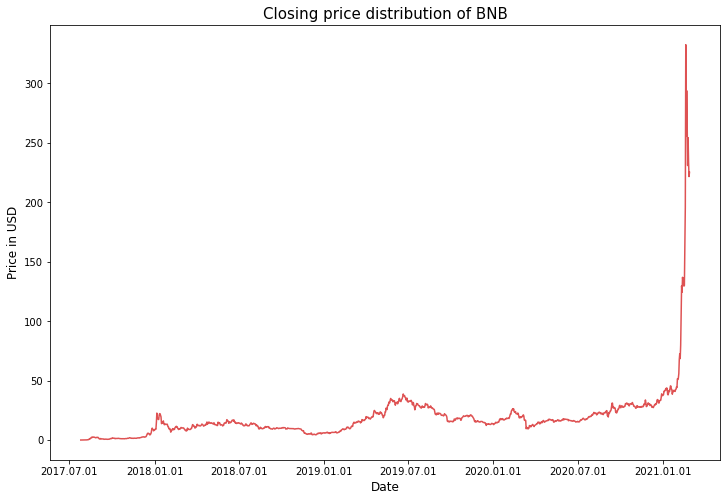

In [5]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12,8))
# sns.lineplot(y = bnb_df.Close.values, x=bnb_df.Date_mpl.values, alpha=0.8, color=color[3])
sns.lineplot(y = bnb_df.Close.values, x=bnb_df.Date.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
# fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of BNB", fontsize=15)
plt.show()

## Candlestick chart

In [6]:
import matplotlib.ticker as mticker
# from matplotlib.finance import candlestick_ohlc
import mplfinance as mpf

bnb_df['Date_mpl'] = bnb_df['Date'].apply(lambda x: mdates.date2num(x))

temp_bnb_df = bnb_df.copy(deep=False)
temp_bnb_df = temp_bnb_df.set_index(['Date'])
temp_bnb_df = temp_bnb_df.drop(['Name', 'Symbol', 'Marketcap','Spread'], axis=1)
temp_bnb_df

,High,Low,Open,Close,Volume,Date_mpl
Date,,,,,,
2017-07-26,0.109013,0.099266,0.105893,0.105138,2.003950e+05,17373.0
2017-07-27,0.108479,0.100888,0.105108,0.107737,3.444990e+05,17374.0
2017-07-28,0.109019,0.101473,0.107632,0.104067,3.425680e+05,17375.0
2017-07-29,0.111264,0.101108,0.104782,0.107811,3.402180e+05,17376.0
2017-07-30,0.108138,0.103162,0.107935,0.106414,2.242610e+05,17377.0
...,...,...,...,...,...,...
2021-02-23,268.536845,190.412463,267.364425,230.994252,8.280753e+09,18681.0
2021-02-24,280.088196,214.524714,231.121604,254.359132,7.154122e+09,18682.0
2021-02-25,264.705134,233.885956,254.467606,233.885956,4.059853e+09,18683.0


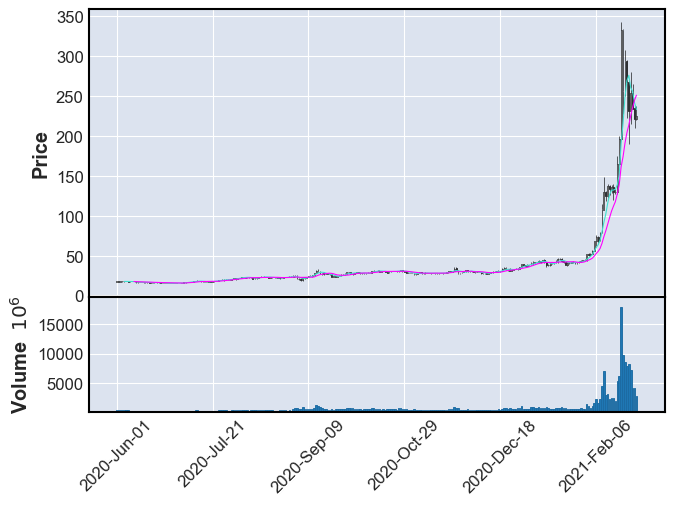

In [7]:
mpf.plot(temp_bnb_df.loc['2020-6-1':], type='candle', mav=(5,10), volume=True)

## Price prediction

In [12]:
from fbprophet import Prophet

In [13]:
INPUT_FILE = "coin_BinanceCoin.csv"

price_predict_df = pd.read_csv("../../resources/prices/" + INPUT_FILE, parse_dates=['Date'], usecols=["Date", "Close"])
price_predict_df.columns = ["ds", "y"]
price_predict_df = price_predict_df[price_predict_df['ds']>'2020-6-1']
price_predict_df

,ds,y
1041,2020-06-01 23:59:59,17.914941
1042,2020-06-02 23:59:59,17.239304
1043,2020-06-03 23:59:59,17.545405
1044,2020-06-04 23:59:59,17.565875
1045,2020-06-05 23:59:59,17.688786
...,...,...
1308,2021-02-23 23:59:59,230.994252
1309,2021-02-24 23:59:59,254.359132
1310,2021-02-25 23:59:59,233.885956
1311,2021-02-26 23:59:59,221.680429


In [14]:
m = Prophet()
m.fit(price_predict_df);
future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
274,2021-03-02 23:59:59,175.601059,145.422891,206.364296
275,2021-03-03 23:59:59,179.494346,150.465490,211.177129
276,2021-03-04 23:59:59,181.374834,150.033137,213.534567
277,2021-03-05 23:59:59,187.108197,156.683627,217.943371
278,2021-03-06 23:59:59,187.489248,155.263823,220.592113


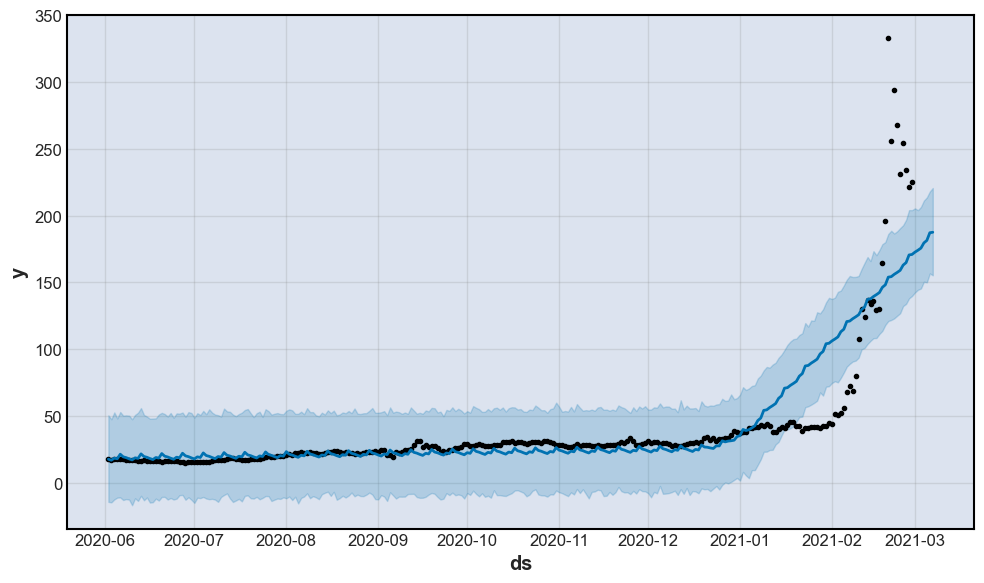

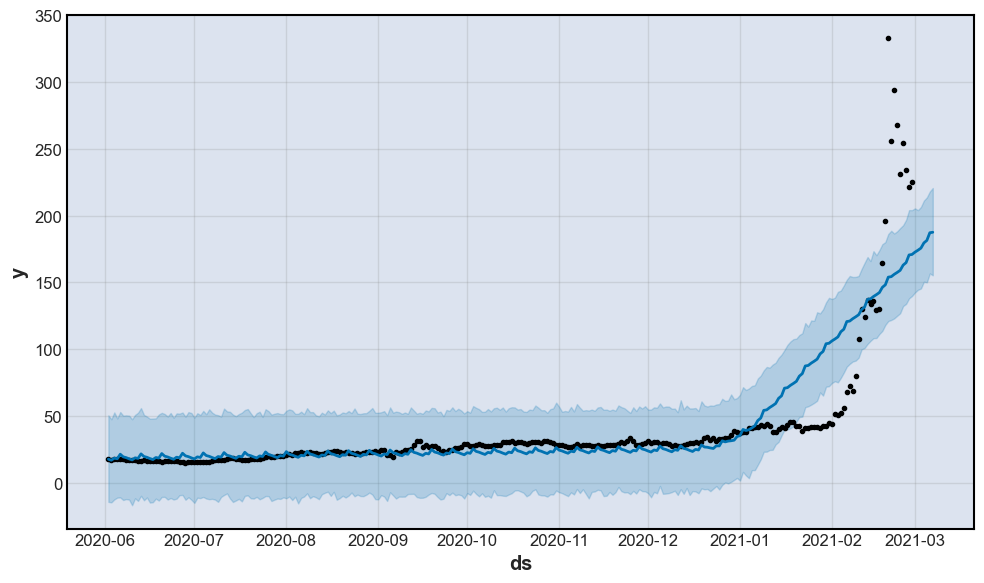

In [15]:
m.plot(forecast)

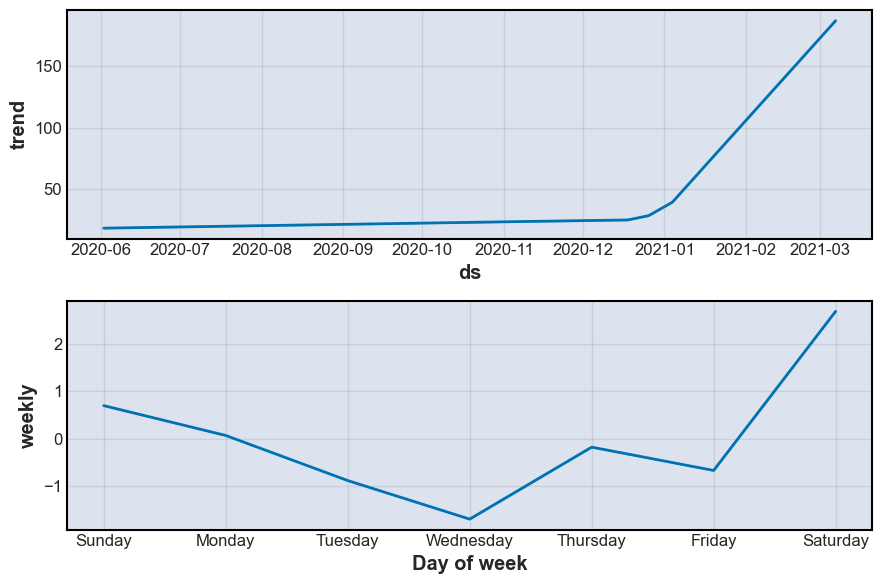

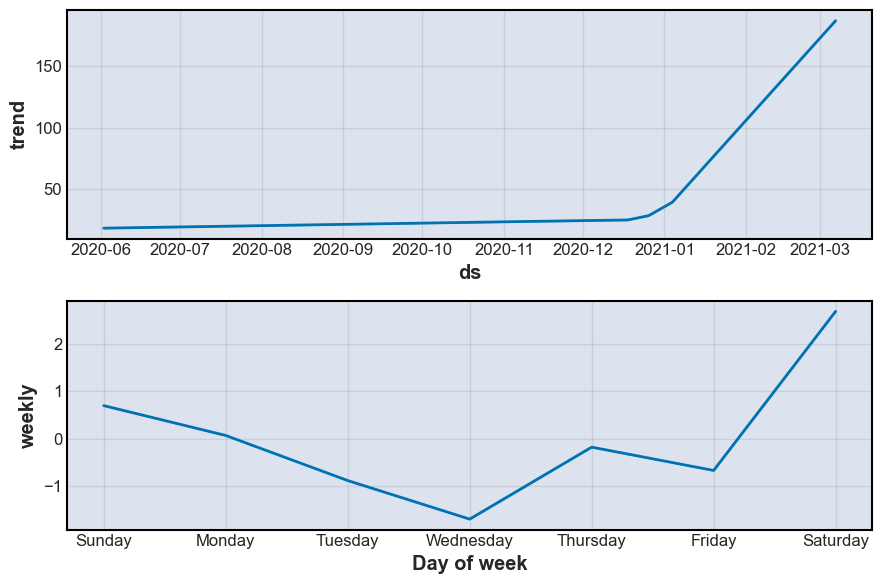

In [16]:
m.plot_components(forecast)